### Библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as ma

# Параметры среды и геометрия волновода

In [20]:
# Параметры среды
lambda_0 = 10 # длина волны в свободном пространстве в мм
eps = 1
c = 3e8

# Размеры волновода
a = 23
b = 10

# Тип волны Emn
m = 1
n = 1

gamma_x = m * ma.pi/a
gamma_y = n * ma.pi/b

# Поперечное волновое число
gamma_normal = ma.sqrt ((gamma_x**2) + (gamma_y**2))

# Критическая длина волны
lambda_kr = 2 * ma.pi / gamma_normal

# Длина волны в волноводе
lambda_v = (lambda_0 / ma.sqrt(eps)) / ma.sqrt(1 - ((lambda_0/lambda_kr)**2)/eps)

# Фазовая скорость
v_phase = (c / ma.sqrt(eps)) / ma.sqrt(1 - ((lambda_0/lambda_kr)**2)/eps)

# Групповая скорость
v_group = (c / ma.sqrt(eps)) * ma.sqrt(1 - ((lambda_0/lambda_kr)**2)/eps)

# Волновое число
k = 2 * ma.pi / lambda_v

omega = k * v_phase

print(('Длина волны в пространстве = %f\n'+
    'Длина волны в волноводе = %f\n' +
    'Критическая длина волны = %f\n'+
    'k = %f\nФазовая скорость = %f\n') %(lambda_0, lambda_v, lambda_kr, k, v_phase))

Длина волны в пространстве = 10.000000
Длина волны в волноводе = 11.928954
Критическая длина волны = 18.341401
k = 0.526717
Фазовая скорость = 357868606.440204



# E-волны в прямоугольном волноводе

In [21]:
# Матрица координат
x = np.arange(0, a, lambda_v/10)
y = np.arange(0, b, lambda_v/10)
z = np.arange(0, 4 * lambda_v, lambda_v/10)
len(z)

40

In [4]:
E0z = 1 # В/м

# Структура поля волны Emn
def getEx(x, y, z):
    Ex = - ((1j * k * gamma_x)/(gamma_normal**2)) * E0z * np.cos(gamma_x * x) * np.sin(gamma_y * y) * np.exp(-1j * k * z)
    return Ex

def getEy(x, y, z):
    Ey = - ((1j * k * gamma_y)/(gamma_normal**2)) * E0z * np.sin(gamma_x * x) * np.cos(gamma_y * y) * np.exp(-1j * k * z)
    return Ey

def getEz(x, y, z):
    Ez = E0z * np.sin(gamma_x * x) * np.sin(gamma_y * y) * np.exp(-1j * k * z)
    return Ez

def getHx(x, y, z):
    Hx = ((1j * omega * eps * gamma_y)/(gamma_normal**2)) * E0z * np.sin(gamma_x * x) * np.cos(gamma_y * y) * np.exp(-1j * k * z)
    return Hx

def getHy(x, y, z):
    Hy = - ((1j * omega * eps * gamma_x)/(gamma_normal**2)) * E0z * np.cos(gamma_x * x) * np.sin(gamma_y * y) * np.exp(-1j * k * z)
    return Hy

def getHz(x, y, z):
    Hz = x * 0 + y * 0 + z * 0
    return Hz

In [22]:
Xz0, Yz0 = np.meshgrid(x, y)
np.shape(Xz0)

(9, 20)

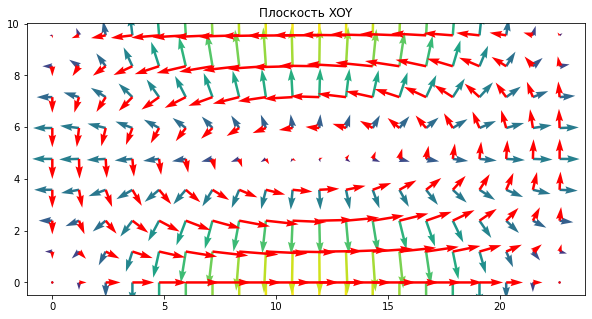

In [23]:
z0 = lambda_v*0 + 0.0001 # координата поперечного сечения

Ex_z0 = getEx(Xz0, Yz0, z0)
Ey_z0 = getEy(Xz0, Yz0, z0)
Hx_z0 = getHx(Xz0, Yz0, z0)
Hy_z0 = getHy(Xz0, Yz0, z0)

Ex_z0 = np.real(Ex_z0)
Ey_z0 = np.real(Ey_z0)
Hx_z0 = np.real(Hx_z0)
Hy_z0 = np.real(Hy_z0)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_title('Плоскость XOY')
C = np.sqrt(Ex_z0**2 + Ey_z0**2)
ax.quiver(Xz0, Yz0, Ex_z0, Ey_z0, C)
C1 = np.sqrt(Hx_z0**2 + Hy_z0**2)
ax.quiver(Xz0, Yz0, Hx_z0, Hy_z0, color = 'red')

plt.show()

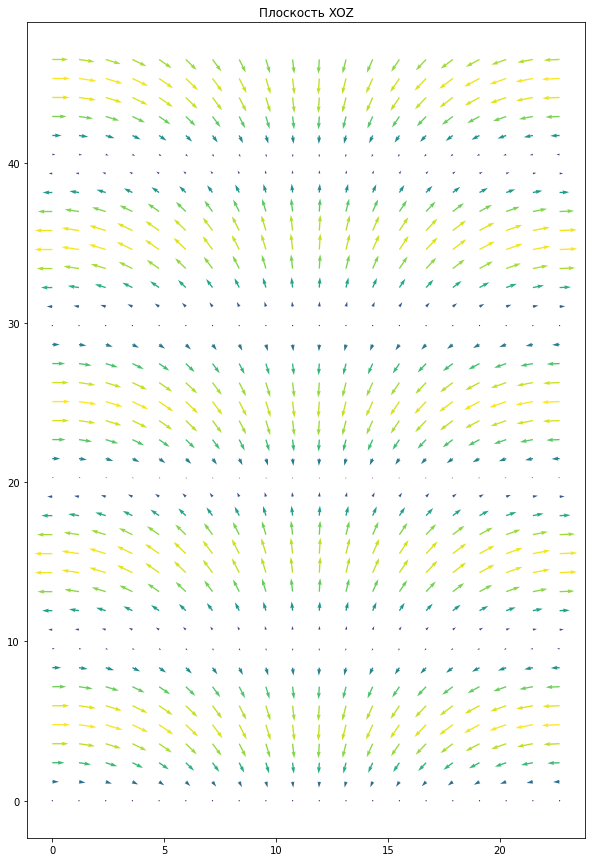

In [26]:
Xy0, Zy0 = np.meshgrid(x, z)

y0 = b/2 # координата поперечного сечения

Ex_y0 = getEx(Xy0, Zy0, y0)
Ez_y0 = getEz(Xy0, Zy0, y0)
Ex_y0 = np.imag(Ex_y0)
Ez_y0 = np.imag(Ez_y0)

fig, ax = plt.subplots(1, 1, figsize=(10,15))
ax.set_title('Плоскость XOZ')
C = np.sqrt(Ex_y0**2 + Ez_y0**2)
ax.quiver(Xy0, Zy0, Ex_y0, Ez_y0, C)
plt.show()


In [8]:
np.max(Ez_y0)

0.7050198656582425

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_title('Плоскость XOY')
C = np.sqrt(Ex**2 + Ey**2)
ax.quiver(X, Y, Ex, Ey, C)
plt.show()

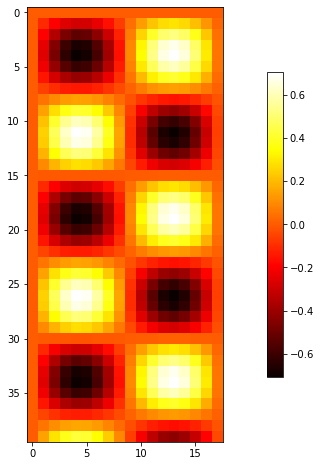

In [9]:
fig, ax = plt.subplots(figsize = (16,8))
im = ax.imshow(Ez_y0, cmap = 'hot')

fig.colorbar(im, shrink=0.7, aspect=20)
plt.show()

X, Y = np.meshgrid(np.arange(0, 4 * np.pi, .2), np.arange(0, 2 * np.pi, .2))

Ex = np.sin(X) + np.cos(Y)
Ey = np.cos(X) + np.cos(Y)

np.shape(X)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_title('Заголовок')

C = Ex + Ey
ax.quiver(X, Y, Ex, Ey, C)
plt.show()

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X) * 0
V = np.sin(X)


plt.figure(figsize=(20,10))
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.figure(figsize=(20,10))
plt.title("pivot='mid'; every third arrow; units='inches'")
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='cm')
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

plt.figure(figsize=(20,10))
plt.title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X, Y, color='k', s=5)

plt.show()